In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
from IPython.display import clear_output
warnings.filterwarnings('ignore')

### Data loading

In [2]:
district_data = pd.read_csv('../data/raw/district.csv', dtype='str')
district_data.head(2)

,district_id,name_chinese,name_english,city_id
0,00101,海淀区,HaiDianQu,001
1,00102,石景山区,ShiJingShanQu,001


In [3]:
# City id is 1 for Beijing
beijing_districts = district_data[district_data.city_id=='001']['district_id']
beijing_districts

0     00101
1     00102
2     00103
3     00104
4     00105
5     00106
6     00107
7     00108
8     00109
9     00110
10    00111
11    00112
12    00113
13    00114
14    00115
15    00116
Name: district_id, dtype: object

In [4]:
station_data = pd.read_csv('../data/raw/station.csv', dtype='str')

beijing_stations = station_data[station_data.district_id.isin(beijing_districts)]
beijing_stations

,station_id,name_chinese,name_english,latitude,longitude,district_id
0,001001,海淀北部新区,HaiDianBeiBuXinQu,40.090679,116.173553,00101
1,001002,海淀北京植物园,HaiDianBeiJingZhiWuYuan,40.003950,116.205310,00101
2,001003,石景山古城,ShiJingShanGuCheng,39.914409,116.184239,00102
3,001004,丰台云岗,FengTaiYunGang,39.815128,116.171150,00103
4,001005,房山良乡,FangShanLiangXiang,39.742767,116.136045,00104
5,001006,海淀万柳,HaiDianWanLiu,39.987313,116.287451,00101
6,001007,朝阳奥体中心,ChaoYangAoTiZhongXin,39.982053,116.397400,00105
7,001008,西直门北大街,XiZhiMenBeiDaJie,39.954047,116.348991,00101
8,001009,西城万寿西宫,XiChengWanShouXiGong,39.878193,116.351974,00106
9,001010,永定门内大街,YongDingMenNeiDaJie,39.876184,116.394009,00103


In [5]:
all_stations = beijing_stations
len(all_stations)

36

In [6]:
beijing_stations["longitude"]

0     116.173553
1     116.205310
2     116.184239
3     116.171150
4     116.136045
5     116.287451
6     116.397400
7     116.348991
8     116.351974
9     116.394009
10    116.367810
11    116.460742
12    116.416883
13    116.483746
14    116.351029
15    116.279082
16    116.406155
17    116.506319
18    116.664162
19    116.407355
20    116.395383
21    116.443448
22    116.655000
23    116.230000
24    116.105999
25    117.099999
26    116.628000
27    116.831999
28    115.971999
29    116.220000
30    115.988000
31    116.911000
32    117.120000
33    116.783000
34    116.300000
35    116.000000
Name: longitude, dtype: object

In [7]:
# plt.figure()
# # for f_i in all_stations:
#     # tmp_trn_df = data[data.station_id.isin(train_stations)].drop_duplicates('station_id')
#     # tmp_tst_df = data[data.station_id.isin(test_stations)].drop_duplicates('station_id')
#     plt.title(f_i)
# plt.scatter(beijing_stations["longitude"], beijing_stations['latitude'])
#     # plt.scatter(tmp_tst_df['longitude'], tmp_tst_df['latitude'], label='test')
#     # plt.legend(bbox_to_anchor=(1.2,1))

In [8]:
# import seaborn as sns

# for station in station_data:
#     if station[:-4] in stations:
#         continue
#     plt.plot(data_me.loc[data_me['station_id'] == station].latitude, data_me.loc[data_me['station_id'] == station].longitude, 'x', color = 'red')
# for station in stations:
#     plt.plot(stations[station]["latitude"], stations[station]
#              ["longitude"], 'o', label=station)
# # plot font to tex
# sns.set()
# # set plt to high res
# %config InlineBackend.figure_format = 'retina'
# plt.rc('text', usetex=True)

# # plot stations that are ONLY in me
# plt.legend()
# plt.show()

In [9]:
beijing_stations.to_csv('tmp_beijing_stations.csv.gz', index=None)

In [10]:
aq_data = pd.read_csv('../data/raw/airquality.csv.gz', dtype='str')
aq_data.head(2)

,station_id,time,PM25_Concentration,PM10_Concentration,NO2_Concentration,CO_Concentration,O3_Concentration,SO2_Concentration
0,001001,2014-05-01 00:00:00,138,159.4,56.3,0.9,50.8,17.2
1,001001,2014-05-01 01:00:00,124,163.9,38.7,0.9,51.1,17.9


In [11]:
beijing_aq = aq_data[aq_data.station_id.isin(beijing_stations.station_id)]
beijing_aq.describe()

,station_id,time,PM25_Concentration,PM10_Concentration,NO2_Concentration,CO_Concentration,O3_Concentration,SO2_Concentration
count,278023,278023,273553,173243,264854,267720,266657,267283
unique,36,8571,670,5600,2353,161,3141,1678
top,001003,2014-05-01 00:00:00,3,5,2,0.3,2,2
freq,8298,36,4650,1610,4731,22178,31387,49551


In [8]:
met_data = pd.read_csv('../data/raw/meteorology.csv.gz', dtype='str')
met_data.head(2)

,id,time,weather,temperature,pressure,humidity,wind_speed,wind_direction
0,001,2014-05-01 02:00:00,NaN,18,755.9,71,2,23
1,001,2014-05-01 05:00:00,NaN,16.8,755.8,78,1,13


In [9]:
beijing_met = met_data[met_data.id.isin(beijing_districts)]
beijing_met.head(2)

,id,time,weather,temperature,pressure,humidity,wind_speed,wind_direction
6189,00101,2014-05-01 00:00:00,0,20,1004,56,7.92,13
6190,00101,2014-05-01 01:00:00,0,18,1004,64,7.56,13


## Combining

In [10]:
beijing_aq_with_dist = pd.merge(beijing_aq, beijing_stations, )
beijing_aq_with_dist.shape, beijing_aq.shape

((278023, 13), (278023, 8))

In [11]:
beijing_aq_with_dist.head(2)

,station_id,time,PM25_Concentration,PM10_Concentration,NO2_Concentration,CO_Concentration,O3_Concentration,SO2_Concentration,name_chinese,name_english,latitude,longitude,district_id
0,001001,2014-05-01 00:00:00,138,159.4,56.3,0.9,50.8,17.2,海淀北部新区,HaiDianBeiBuXinQu,40.090679,116.173553,00101
1,001001,2014-05-01 01:00:00,124,163.9,38.7,0.9,51.1,17.9,海淀北部新区,HaiDianBeiBuXinQu,40.090679,116.173553,00101


In [12]:
date_index = pd.date_range('2014-05-01 00:00:00', '2015-04-30 23:00:00', freq='H')
station_index = beijing_aq.station_id.unique()

combo_df = pd.DataFrame(index=pd.MultiIndex.from_product([date_index, station_index], 
                                                         names=['time', 'station_id']))

combo_df = combo_df.reset_index()
beijing_stations2 = beijing_stations.set_index('station_id')
combo_df['longitude'] = combo_df['station_id'].apply(lambda x: beijing_stations2.loc[x, 'longitude'])
combo_df['latitude'] = combo_df['station_id'].apply(lambda x: beijing_stations2.loc[x, 'latitude'])

combo_df = combo_df.set_index(['time', 'station_id'])
combo_df.head(2)

longitude   latitude
time       station_id                       
2014-05-01 001001      116.173553  40.090679
           001002      116.205310  40.003950

In [13]:
beijing_aq['time'] = pd.to_datetime(beijing_aq['time'])
beijing_aq2 = beijing_aq.set_index(['time', 'station_id'])
beijing_aq2.head(2)

,,PM25_Concentration,PM10_Concentration,NO2_Concentration,CO_Concentration,O3_Concentration,SO2_Concentration
time,station_id,,,,,,
2014-05-01 00:00:00,001001,138,159.4,56.3,0.9,50.8,17.2
2014-05-01 01:00:00,001001,124,163.9,38.7,0.9,51.1,17.9


### Merging AQ data to global df

In [14]:
for col in beijing_aq2.columns:
    combo_df[col] = beijing_aq2[col]

combo_df

longitude   latitude PM25_Concentration  \
time                station_id                                             
2014-05-01 00:00:00 001001      116.173553  40.090679                138   
                    001002      116.205310  40.003950                 89   
                    001003      116.184239  39.914409                105   
                    001004      116.171150  39.815128                 98   
                    001005      116.136045  39.742767                109   
...                                    ...        ...                ...   
2015-04-30 23:00:00 001032      116.911000  40.499000                NaN   
                    001033      117.120000  40.100000                NaN   
                    001034      116.783000  39.712000                NaN   
                    001035      116.300000  39.520000                NaN   
                    001036      116.000000  39.579999                NaN   

                               PM10_Concentration NO2_Concentration  \
time                station_id                                        
2014-05-01 00:00:00 001001                  159.4              56.3   
                    001002                  132.9              30.5   
                    001003                  196.4              79.9   
                    001004                  159.9              44.8   
                    001005                  112.9                51   
...                                           ...               ...   
2015-04-30 23:00:00 001032                    NaN               NaN   
                    001033                    NaN               NaN   
                    001034                    NaN               NaN   
                    001035                    NaN               NaN   
                    001036                    NaN               NaN   

                               CO_Concentration O3_Concentration  \
time                station_id                                     
2014-05-01 00:00:00 001001                  0.9             50.8   
                    001002                  0.8             96.5   
                    001003                  0.8             75.7   
                    001004                  0.9            105.4   
                    001005                  0.9               86   
...                                         ...              ...   
2015-04-30 23:00:00 001032                  NaN              NaN   
                    001033                  NaN              NaN   
                    001034                  NaN              NaN   
                    001035                  NaN              NaN   
                    001036                  NaN              NaN   

                               SO2_Concentration  
time                station_id                    
2014-05-01 00:00:00 001001                  17.2  
                    001002                   7.6  
                    001003                   9.1  
                    001004                  13.2  
                    001005                   7.3  
...                                          ...  
2015-04-30 23:00:00 001032                   NaN  
                    001033                   NaN  
                    001034                   NaN  
                    001035                   NaN  
                    001036                   NaN  

[315360 rows x 8 columns]

### Merging Meteorological data in global df

In [15]:
beijing_met2 = beijing_met.rename(columns={'id': 'district_id'})
beijing_met2['time'] = pd.to_datetime(beijing_met2['time'])
beijing_met2.head(2)
beijing_met_with_station = pd.merge(beijing_met2, beijing_stations).drop(columns=['district_id', 'name_chinese', 
                                                                                  'name_english', 'latitude', 'longitude'])
beijing_met_with_station2 = beijing_met_with_station.set_index(['time', 'station_id'])
beijing_met_with_station2

weather temperature pressure humidity  \
time                station_id                                         
2014-05-01 00:00:00 001001           0          20     1004       56   
                    001002           0          20     1004       56   
                    001006           0          20     1004       56   
                    001008           0          20     1004       56   
2014-05-01 01:00:00 001001           0          18     1004       64   
...                                ...         ...      ...      ...   
2015-04-30 20:00:00 001031           4          22      954       51   
2015-04-30 22:00:00 001029           4        21.3      954       54   
                    001031           4        21.3      954       54   
2015-04-30 23:00:00 001029           1        17.9      955       76   
                    001031           1        17.9      955       76   

                               wind_speed wind_direction  
time                station_id                            
2014-05-01 00:00:00 001001           7.92             13  
                    001002           7.92             13  
                    001006           7.92             13  
                    001008           7.92             13  
2014-05-01 01:00:00 001001           7.56             13  
...                                   ...            ...  
2015-04-30 20:00:00 001031            2.7             13  
2015-04-30 22:00:00 001029            1.6             13  
                    001031            1.6             13  
2015-04-30 23:00:00 001029            1.5             14  
                    001031            1.5             14  

[245812 rows x 6 columns]

In [16]:
for col in beijing_met_with_station2.columns:
    combo_df[col] = beijing_met_with_station2[col]

combo_df

longitude   latitude PM25_Concentration  \
time                station_id                                             
2014-05-01 00:00:00 001001      116.173553  40.090679                138   
                    001002      116.205310  40.003950                 89   
                    001003      116.184239  39.914409                105   
                    001004      116.171150  39.815128                 98   
                    001005      116.136045  39.742767                109   
...                                    ...        ...                ...   
2015-04-30 23:00:00 001032      116.911000  40.499000                NaN   
                    001033      117.120000  40.100000                NaN   
                    001034      116.783000  39.712000                NaN   
                    001035      116.300000  39.520000                NaN   
                    001036      116.000000  39.579999                NaN   

                               PM10_Concentration NO2_Concentration  \
time                station_id                                        
2014-05-01 00:00:00 001001                  159.4              56.3   
                    001002                  132.9              30.5   
                    001003                  196.4              79.9   
                    001004                  159.9              44.8   
                    001005                  112.9                51   
...                                           ...               ...   
2015-04-30 23:00:00 001032                    NaN               NaN   
                    001033                    NaN               NaN   
                    001034                    NaN               NaN   
                    001035                    NaN               NaN   
                    001036                    NaN               NaN   

                               CO_Concentration O3_Concentration  \
time                station_id                                     
2014-05-01 00:00:00 001001                  0.9             50.8   
                    001002                  0.8             96.5   
                    001003                  0.8             75.7   
                    001004                  0.9            105.4   
                    001005                  0.9               86   
...                                         ...              ...   
2015-04-30 23:00:00 001032                  NaN              NaN   
                    001033                  NaN              NaN   
                    001034                  NaN              NaN   
                    001035                  NaN              NaN   
                    001036                  NaN              NaN   

                               SO2_Concentration weather temperature pressure  \
time                station_id                                                  
2014-05-01 00:00:00 001001                  17.2       0          20     1004   
                    001002                   7.6       0          20     1004   
                    001003                   9.1       0          20     1004   
                    001004                  13.2       0          20     1004   
                    001005                   7.3       0          19     1002   
...                                          ...     ...         ...      ...   
2015-04-30 23:00:00 001032                   NaN       1        17.9     1003   
                    001033                   NaN       1        19.5     1008   
                    001034                   NaN       0          21      NaN   
                    001035                   NaN       1        20.3     1007   
                    001036                   NaN       1        19.8     1005   

                               humidity wind_speed wind_direction  
time                station_id                                     
2014-05-01 00:00:00 001001           56      

<AxesSubplot: >

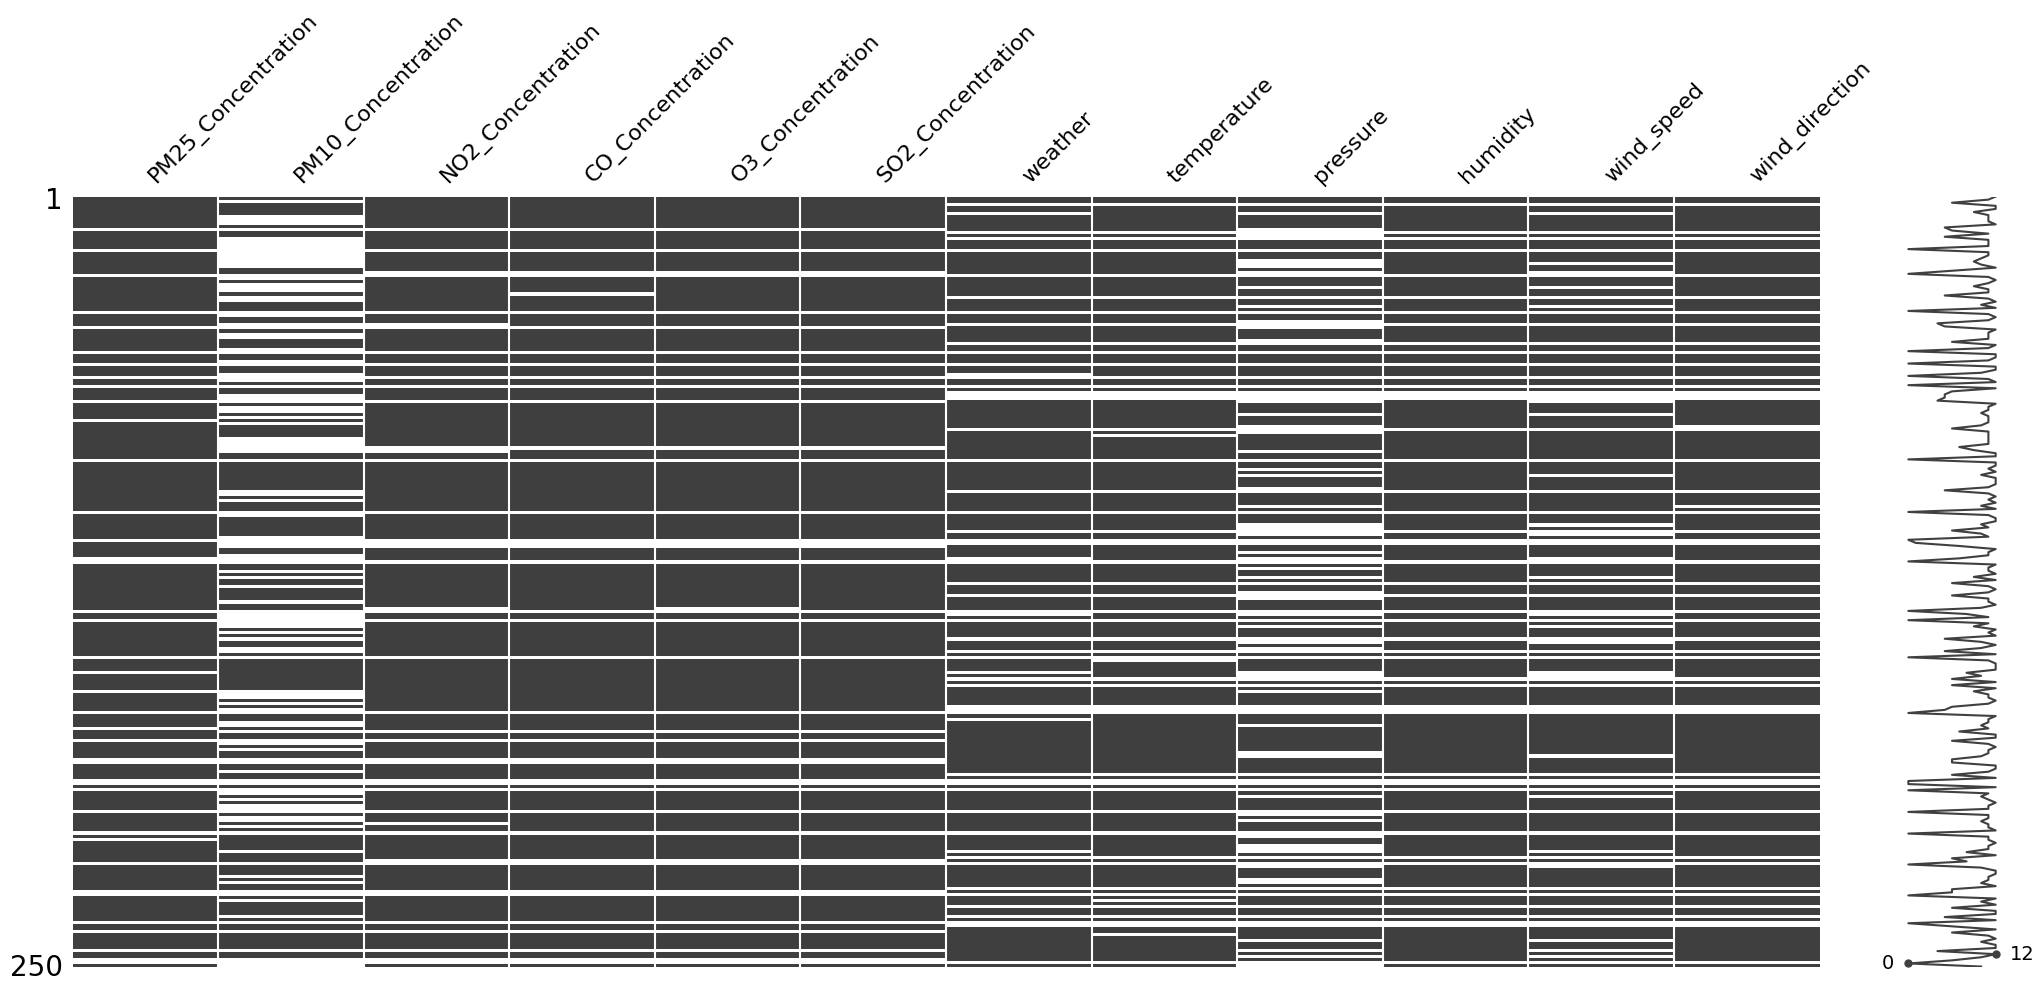

In [19]:
import missingno as msno
%matplotlib inline

plot_df = combo_df.drop(columns=["latitude", "longitude"])
msno.matrix(plot_df.sample(250))

In [17]:
combo_df.reset_index().to_csv('tmp_beijing_aq_plus_met.csv.gz', index=None)